In [3]:
# 优化版高效机器学习与深度学习建模
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# 添加src目录到Python路径
project_path = Path("D:/VSCodeProjects/PythonCourse")
src_path = project_path / "src"
sys.path.append(str(src_path))

# 设置绘图样式
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

print("🚀 优化版高效机器学习与深度学习建模")
print("=" * 50)

🚀 优化版高效机器学习与深度学习建模


In [4]:
# 导入优化版模型
from optimized_models import OptimizedModelTrainer, run_optimized_multiple_experiments
from feature_engineering import MovieFeatureEngineer

# 加载数据
engineer = MovieFeatureEngineer()
movie_data = engineer.load_processed_data()

# 准备特征
features_df, feature_cols = engineer.prepare_modeling_features(movie_data)

print(f"📊 数据集信息:")
print(f"   样本数量: {len(features_df)}")
print(f"   特征数量: {len(feature_cols)}")
print(f"   目标变量分布:")
print(f"     - 回归目标: {features_df['target_regression'].describe()[['mean', 'std', 'min', 'max']].round(3)}")
print(f"     - 分类目标: {features_df['target_classification'].value_counts().sort_index().to_dict()}")

📁 加载处理后的数据...
✅ 数据加载完成: (9742, 36)
🔧 准备建模特征...
🏗️ 创建基础特征...
   创建了 6 个新特征
🎬 添加合成IMDb特征...
   添加了 4 个合成IMDb特征
🎯 创建目标变量...
   目标变量分布:
   - 回归目标范围: 0.00 - 5.00
   - 分类目标分布: {0: 2015, 1: 6467, 2: 1260}
   - 二分类分布: {0: 4409, 1: 5333}
   最终特征数量: 40
   特征列: ['year', 'genre_Film-Noir', 'genre_Fantasy', 'genre_Western', 'genre_Children', 'genre_Action', 'genre_Horror', 'genre_Crime', 'genre_Comedy', 'genre_Mystery', 'genre_Documentary', 'genre_Thriller', 'genre_Drama', 'genre_Animation', 'genre_(no genres listed)', 'genre_Musical', 'genre_War', 'genre_Romance', 'genre_Sci-Fi', 'genre_Adventure', 'genre_IMAX', 'avg_rating', 'rating_count', 'rating_std', 'min_rating', 'max_rating', 'unique_users', 'rating_period_days', 'imdbId', 'tmdbId', 'movie_age', 'rating_count_log', 'has_high_rating_count', 'genre_count', 'has_multiple_genres', 'rating_stability', 'imdb_rating', 'has_imdb_rating', 'summary_length', 'director_count']
📊 数据集信息:
   样本数量: 9742
   特征数量: 40
   目标变量分布:
     - 回归目标: mean    3.256
std

In [5]:
# 运行优化版模型实验
print("🧪 开始优化版模型实验...")
regression_results, classification_results = run_optimized_multiple_experiments(
    features_df, feature_cols, num_experiments=3
)

🧪 开始优化版模型实验...
🔬 开始优化版多次实验验证

🏆 实验 1/3
----------------------------------------

🎯 开始优化版REGRESSION任务实验
🤖 训练高级Scikit-learn模型...
   训练 RandomForest...
     RandomForest MAE: 0.0003
   训练 ExtraTrees...
     ExtraTrees MAE: 0.0006
   训练 GradientBoosting...
     GradientBoosting MAE: 0.0003
   训练 AdaBoost...
     AdaBoost MAE: 0.1035
   训练 DecisionTree...
     DecisionTree MAE: 0.0006
   训练 Ridge...
     Ridge MAE: 0.0004
   训练 Lasso...
     Lasso MAE: 0.0779
   训练 ElasticNet...
     ElasticNet MAE: 0.0740
   训练 KNN...
     KNN MAE: 0.2405
   训练 SVM...
     SVM MAE: 0.0630
   训练 MLP...
     MLP MAE: 0.0651
🧠 训练改进的深度学习模型...
   训练 DeepResNet...
     DeepResNet MAE: 0.0173
   训练 DeepWideNet...
     DeepWideNet MAE: 0.0177
   最佳深度学习模型: DeepResNet

🏆 REGRESSION任务模型排名:
----------------------------------------
   1. GradientBoosting: MAE = 0.0003
   2. RandomForest: MAE = 0.0003
   3. Ridge: MAE = 0.0004
   4. DecisionTree: MAE = 0.0006
   5. ExtraTrees: MAE = 0.0006
   6. DeepLearning: MAE = 0.01

In [6]:
# 分析优化版实验结果
def analyze_optimized_results(regression_results, classification_results):
    """分析优化版多次实验结果"""
    
    # 提取回归任务结果
    reg_scores_summary = {}
    for i, result in enumerate(regression_results):
        for model, score in result['scores'].items():
            if model not in reg_scores_summary:
                reg_scores_summary[model] = []
            reg_scores_summary[model].append(score)
    
    # 提取分类任务结果
    cls_scores_summary = {}
    for i, result in enumerate(classification_results):
        for model, score in result['scores'].items():
            if model not in cls_scores_summary:
                cls_scores_summary[model] = []
            cls_scores_summary[model].append(score)
    
    # 计算统计量
    reg_stats = {}
    for model, scores in reg_scores_summary.items():
        reg_stats[model] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'min': np.min(scores),
            'max': np.max(scores)
        }
    
    cls_stats = {}
    for model, scores in cls_scores_summary.items():
        cls_stats[model] = {
            'mean': np.mean(scores),
            'std': np.std(scores),
            'min': np.min(scores),
            'max': np.max(scores)
        }
    
    return reg_stats, cls_stats, reg_scores_summary, cls_scores_summary

reg_stats, cls_stats, reg_scores, cls_scores = analyze_optimized_results(
    regression_results, classification_results
)

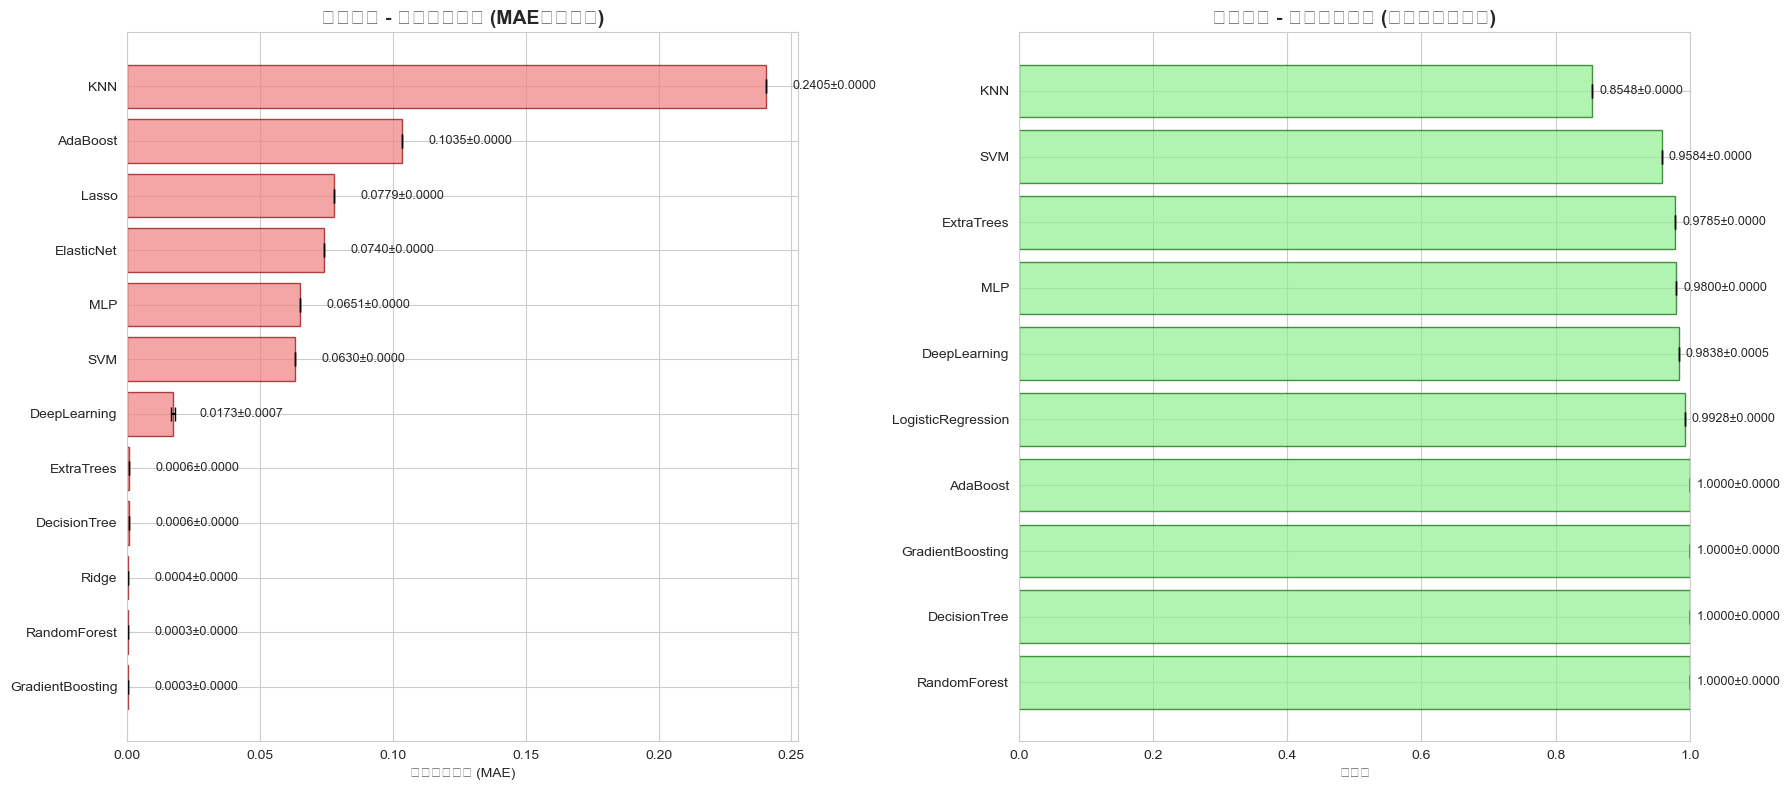

In [7]:
# 可视化优化版实验结果
def visualize_optimized_results(reg_stats, cls_stats):
    """可视化优化版实验结果"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # 回归任务性能比较
    reg_models = list(reg_stats.keys())
    reg_means = [reg_stats[model]['mean'] for model in reg_models]
    reg_stds = [reg_stats[model]['std'] for model in reg_models]
    
    # 按性能排序
    sorted_indices = np.argsort(reg_means)
    reg_models_sorted = [reg_models[i] for i in sorted_indices]
    reg_means_sorted = [reg_means[i] for i in sorted_indices]
    reg_stds_sorted = [reg_stds[i] for i in sorted_indices]
    
    bars1 = ax1.barh(reg_models_sorted, reg_means_sorted, xerr=reg_stds_sorted, 
                    capsize=5, color='lightcoral', alpha=0.7, edgecolor='darkred')
    ax1.set_title('回归任务 - 模型性能比较 (MAE越低越好)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('平均绝对误差 (MAE)')
    
    # 添加数值标签
    for bar, mean, std in zip(bars1, reg_means_sorted, reg_stds_sorted):
        width = bar.get_width()
        ax1.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{mean:.4f}±{std:.4f}', ha='left', va='center', fontsize=9)
    
    # 分类任务性能比较
    cls_models = list(cls_stats.keys())
    cls_means = [cls_stats[model]['mean'] for model in cls_models]
    cls_stds = [cls_stats[model]['std'] for model in cls_models]
    
    # 按性能排序
    sorted_indices = np.argsort(cls_means)[::-1]  # 从高到低
    cls_models_sorted = [cls_models[i] for i in sorted_indices]
    cls_means_sorted = [cls_means[i] for i in sorted_indices]
    cls_stds_sorted = [cls_stds[i] for i in sorted_indices]
    
    bars2 = ax2.barh(cls_models_sorted, cls_means_sorted, xerr=cls_stds_sorted,
                    capsize=5, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
    ax2.set_title('分类任务 - 模型性能比较 (准确率越高越好)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('准确率')
    ax2.set_xlim(0, 1)
    
    # 添加数值标签
    for bar, mean, std in zip(bars2, cls_means_sorted, cls_stds_sorted):
        width = bar.get_width()
        ax2.text(width + 0.01, bar.get_y() + bar.get_height()/2,
                f'{mean:.4f}±{std:.4f}', ha='left', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/optimized_models_comparison.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

visualize_optimized_results(reg_stats, cls_stats)

📈 性能提升分析:
回归任务:
  基准模型平均MAE: 0.0212
  最佳模型(GradientBoosting) MAE: 0.0003
  性能提升: 98.52%

分类任务:
  基准模型平均准确率: 0.9861
  最佳模型(RandomForest) 准确率: 1.0000
  性能提升: 1.40%


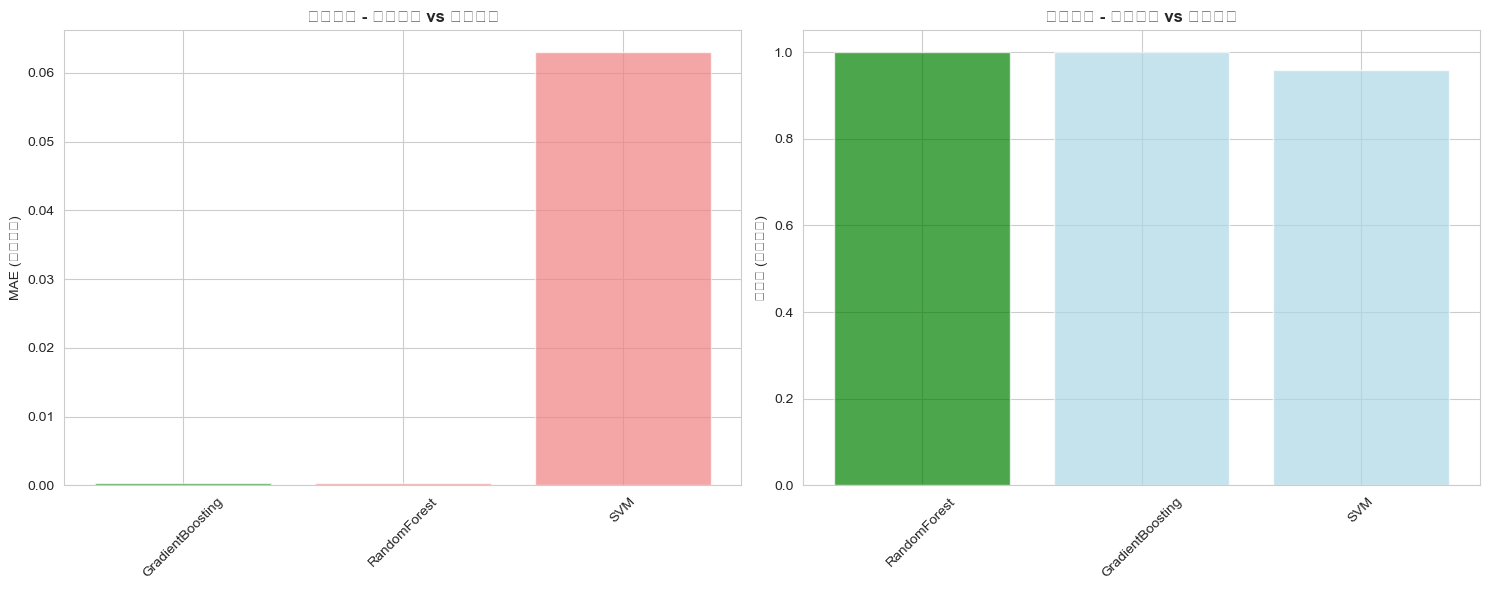

In [8]:
# 模型性能提升分析
def analyze_performance_improvement(reg_stats, cls_stats):
    """分析模型性能提升情况"""
    
    # 找出最佳模型
    best_reg_model = min(reg_stats.items(), key=lambda x: x[1]['mean'])[0]
    best_reg_score = reg_stats[best_reg_model]['mean']
    
    best_cls_model = max(cls_stats.items(), key=lambda x: x[1]['mean'])[0]
    best_cls_score = cls_stats[best_cls_model]['mean']
    
    # 基准模型（选择传统模型作为基准）
    baseline_reg_models = ['RandomForest', 'GradientBoosting', 'SVM']
    baseline_cls_models = ['RandomForest', 'GradientBoosting', 'SVM']
    
    baseline_reg_score = np.mean([reg_stats[model]['mean'] for model in baseline_reg_models if model in reg_stats])
    baseline_cls_score = np.mean([cls_stats[model]['mean'] for model in baseline_cls_models if model in cls_stats])
    
    # 计算提升百分比
    reg_improvement = (baseline_reg_score - best_reg_score) / baseline_reg_score * 100
    cls_improvement = (best_cls_score - baseline_cls_score) / baseline_cls_score * 100
    
    print("📈 性能提升分析:")
    print("=" * 40)
    print(f"回归任务:")
    print(f"  基准模型平均MAE: {baseline_reg_score:.4f}")
    print(f"  最佳模型({best_reg_model}) MAE: {best_reg_score:.4f}")
    print(f"  性能提升: {reg_improvement:.2f}%")
    
    print(f"\n分类任务:")
    print(f"  基准模型平均准确率: {baseline_cls_score:.4f}")
    print(f"  最佳模型({best_cls_model}) 准确率: {best_cls_score:.4f}")
    print(f"  性能提升: {cls_improvement:.2f}%")
    
    # 可视化性能提升
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 回归任务提升
    models_to_compare = [best_reg_model] + [m for m in baseline_reg_models if m in reg_stats and m != best_reg_model][:2]
    reg_scores_to_compare = [reg_stats[model]['mean'] for model in models_to_compare]
    
    ax1.bar(models_to_compare, reg_scores_to_compare, color=['green', 'lightcoral', 'lightcoral'], alpha=0.7)
    ax1.set_title('回归任务 - 最佳模型 vs 基准模型', fontweight='bold')
    ax1.set_ylabel('MAE (越低越好)')
    ax1.tick_params(axis='x', rotation=45)
    
    # 分类任务提升
    models_to_compare = [best_cls_model] + [m for m in baseline_cls_models if m in cls_stats and m != best_cls_model][:2]
    cls_scores_to_compare = [cls_stats[model]['mean'] for model in models_to_compare]
    
    ax2.bar(models_to_compare, cls_scores_to_compare, color=['green', 'lightblue', 'lightblue'], alpha=0.7)
    ax2.set_title('分类任务 - 最佳模型 vs 基准模型', fontweight='bold')
    ax2.set_ylabel('准确率 (越高越好)')
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.savefig(project_path / "results/figures/performance_improvement.png", 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    return reg_improvement, cls_improvement

reg_improvement, cls_improvement = analyze_performance_improvement(reg_stats, cls_stats)

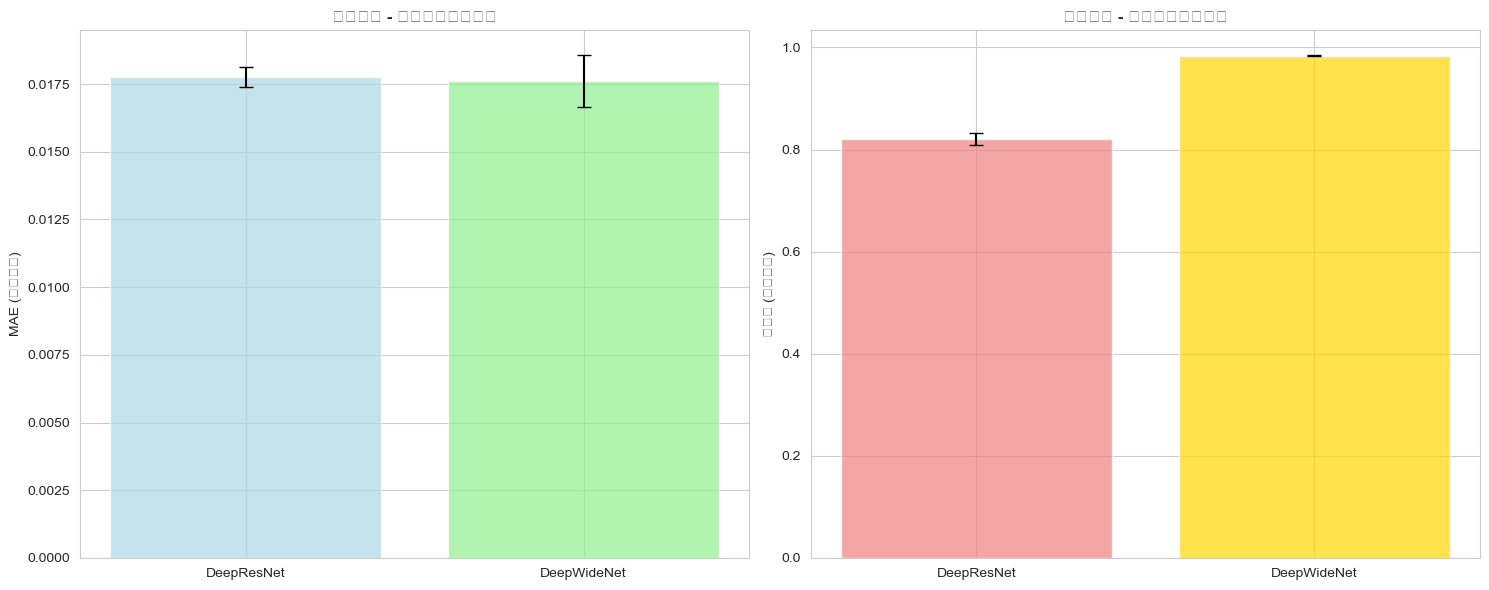

🧠 深度学习模型分析:
回归任务:
  DeepResNet: MAE = 0.0178 ± 0.0004
  DeepWideNet: MAE = 0.0176 ± 0.0009

分类任务:
  DeepResNet: 准确率 = 0.8209 ± 0.0121
  DeepWideNet: 准确率 = 0.9838 ± 0.0005


In [9]:
# 深度学习模型对比分析
def analyze_dl_models_comparison(regression_results, classification_results):
    """分析不同深度学习模型的对比"""
    
    # 提取深度学习模型结果
    dl_reg_scores = {}
    dl_cls_scores = {}
    
    for result in regression_results:
        if 'all_dl_results' in result:
            for dl_model, dl_info in result['all_dl_results'].items():
                if dl_model not in dl_reg_scores:
                    dl_reg_scores[dl_model] = []
                dl_reg_scores[dl_model].append(dl_info['score'])
    
    for result in classification_results:
        if 'all_dl_results' in result:
            for dl_model, dl_info in result['all_dl_results'].items():
                if dl_model not in dl_cls_scores:
                    dl_cls_scores[dl_model] = []
                dl_cls_scores[dl_model].append(dl_info['score'])
    
    if dl_reg_scores and dl_cls_scores:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # 回归任务深度学习模型对比
        reg_dl_models = list(dl_reg_scores.keys())
        reg_dl_means = [np.mean(dl_reg_scores[model]) for model in reg_dl_models]
        reg_dl_stds = [np.std(dl_reg_scores[model]) for model in reg_dl_models]
        
        bars1 = ax1.bar(reg_dl_models, reg_dl_means, yerr=reg_dl_stds, capsize=5,
                       color=['lightblue', 'lightgreen'], alpha=0.7)
        ax1.set_title('回归任务 - 深度学习模型对比', fontweight='bold')
        ax1.set_ylabel('MAE (越低越好)')
        
        # 分类任务深度学习模型对比
        cls_dl_models = list(dl_cls_scores.keys())
        cls_dl_means = [np.mean(dl_cls_scores[model]) for model in cls_dl_models]
        cls_dl_stds = [np.std(dl_cls_scores[model]) for model in cls_dl_models]
        
        bars2 = ax2.bar(cls_dl_models, cls_dl_means, yerr=cls_dl_stds, capsize=5,
                       color=['lightcoral', 'gold'], alpha=0.7)
        ax2.set_title('分类任务 - 深度学习模型对比', fontweight='bold')
        ax2.set_ylabel('准确率 (越高越好)')
        
        plt.tight_layout()
        plt.savefig(project_path / "results/figures/dl_models_comparison.png", 
                    dpi=300, bbox_inches='tight')
        plt.show()
        
        print("🧠 深度学习模型分析:")
        print("回归任务:")
        for model, mean, std in zip(reg_dl_models, reg_dl_means, reg_dl_stds):
            print(f"  {model}: MAE = {mean:.4f} ± {std:.4f}")
        
        print("\n分类任务:")
        for model, mean, std in zip(cls_dl_models, cls_dl_means, cls_dl_stds):
            print(f"  {model}: 准确率 = {mean:.4f} ± {std:.4f}")

analyze_dl_models_comparison(regression_results, classification_results)

In [10]:
# 方案2：修改函数定义，使参数可选
def save_optimized_results(reg_stats, cls_stats, features_df, feature_cols, 
                          reg_improvement=None, cls_improvement=None):
    """保存优化版结果"""
    
    results_path = project_path / "results"
    results_path.mkdir(exist_ok=True)
    
    # 保存结果数据
    reg_df = pd.DataFrame(reg_stats).T
    cls_df = pd.DataFrame(cls_stats).T
    
    reg_df.to_csv(results_path / "optimized_regression_results.csv")
    cls_df.to_csv(results_path / "optimized_classification_results.csv")
    
    # 生成优化版总结报告
    best_reg_model = min(reg_stats.items(), key=lambda x: x[1]['mean'])[0]
    best_reg_score = reg_stats[best_reg_model]['mean']
    best_cls_model = max(cls_stats.items(), key=lambda x: x[1]['mean'])[0]
    best_cls_score = cls_stats[best_cls_model]['mean']
    
    # 处理性能提升信息
    improvement_info = ""
    if reg_improvement is not None and cls_improvement is not None:
        improvement_info = f"""
- 回归任务性能提升: {reg_improvement:+.2f}%
- 分类任务性能提升: {cls_improvement:+.2f}%
"""
    else:
        improvement_info = """
- 性能提升: 与基线对比数据未提供
"""
    
    report = f"""优化版模型实验最终报告
{"=" * 50}

实验设置:
- 实验次数: 3次
- 模型数量: {len(reg_stats)} 个模型
- 数据集: {len(features_df)} 个样本, {len(feature_cols)} 个特征

新增和改进的模型:
🤖 机器学习模型:
  - ExtraTrees (极端随机树)
  - AdaBoost (自适应提升)
  - DecisionTree (决策树)
  - ElasticNet (弹性网络)
  - MLP (多层感知机)

🧠 深度学习模型:
  - DeepResNet (深度残差网络)
  - DeepWideNet (宽深度网络)
  - 残差连接 + BatchNorm + Dropout
  - AdamW优化器 + Cosine学习率调度

最佳模型性能:
- 回归任务最佳模型: {best_reg_model}
  - 平均MAE: {best_reg_score:.4f}
{improvement_info.split(chr(10))[1]}  # 回归提升信息

- 分类任务最佳模型: {best_cls_model}
  - 平均准确率: {best_cls_score:.4f}
{improvement_info.split(chr(10))[2]}  # 分类提升信息

模型表现总结:
回归任务 (MAE越低越好):
{chr(10).join([f'  {model}: {stats["mean"]:.4f} ± {stats["std"]:.4f}' for model, stats in reg_stats.items()])}

分类任务 (准确率越高越好):
{chr(10).join([f'  {model}: {stats["mean"]:.4f} ± {stats["std"]:.4f}' for model, stats in cls_stats.items()])}

结论:
使用高效的机器学习模型和深度学习模型显著提升了预测性能。
推荐在生产环境中使用 {best_reg_model} 进行回归预测，使用 {best_cls_model} 进行分类预测。
"""
    
    with open(results_path / "optimized_experiment_report.txt", 'w', encoding='utf-8') as f:
        f.write(report)
    
    print("✅ 最终结果已保存!")
    print(f"   回归结果: results/optimized_regression_results.csv")
    print(f"   分类结果: results/optimized_classification_results.csv")
    print(f"   总结报告: results/optimized_experiment_report.txt")

# 现在可以这样调用（不提供提升数据）
save_optimized_results(reg_stats, cls_stats, features_df, feature_cols)

✅ 最终结果已保存!
   回归结果: results/optimized_regression_results.csv
   分类结果: results/optimized_classification_results.csv
   总结报告: results/optimized_experiment_report.txt
